1. Setup and get data

1.1 install the libraries or dependencies which we will use further

we will colect images using opencv

In [1]:
import os 
import time
import uuid
import cv2

In [2]:
uuid.uuid1()

UUID('926f2001-d791-11ee-8d0e-7cc2c64ab6fe')

In [3]:
IMAGES_PATH = os.path.join('ash','images')
number_images =  10

In [4]:
import cv2
from IPython.display import display, Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
    

In [19]:
from platform import python_version
python_version()

'3.11.5'

In [16]:
cap.release()

## WE WILL ANNOTATE THE IMAGES WITH LABELME

In [9]:
!pip install labelme 

  Using cached labelme-5.4.1-py3-none-any.whl
  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/cb/56/f4845ed78723a4eb8eb22bcfcb46e1157a462c78c0a5ed318c68c98f9a79/gdown-5.1.0-py3-none-any.whl.metadata
  Using cached gdown-5.1.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached imgviz-1.7.5-py3-none-any.whl
  Obtaining dependency information for onnxruntime!=1.16.0,>=1.14.1 from https://files.pythonhosted.org/packages/43/24/37ca26db9e135817cbda65bae34af02a6f5c394a3968d07f2bf190e788fd/onnxruntime-1.17.1-cp311-cp311-win_amd64.whl.metadata
  Using cached onnxruntime-1.17.1-cp311-cp311-win_amd64.whl.metadata (4.4 kB)
  Obtaining dependency information for coloredlogs from https://files.pythonhosted.org/packages/a7/06/3d6badcf13db419e25b07041d9c7b4a2c331d3f4e7134445ec5df57714cd/coloredlogs-15.0.1-py2.py3-none-any.whl.metadata
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
Using cached onnxruntime-1.17.1-cp311-cp311-win_amd64.wh

In [10]:
!labelme

2024-02-28 22:51:58,671 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\ashis\.labelmerc


###### review images and build image loading function

In [8]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for ml-dtypes~=0.2.0 from https://files.pythonhosted.org/packages/08/89/c727fde1a3d12586e0b8c01abf53754707d76beaa9987640e70807d4545f/ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.or

In [7]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [8]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [3]:
images.as_numpy_iterator().next()

b'data\\images\\2a3223b9-d604-11ee-b1da-f5ba6e523fbf.jpg'

In [9]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [10]:
images = images.map(load_image)

In [11]:
images.as_numpy_iterator().next()

array([[[142, 141, 136],
        [136, 135, 130],
        [144, 145, 139],
        ...,
        [126, 160, 172],
        [127, 156, 170],
        [126, 155, 169]],

       [[139, 138, 133],
        [137, 136, 131],
        [144, 145, 139],
        ...,
        [127, 161, 173],
        [128, 157, 171],
        [127, 156, 170]],

       [[137, 137, 129],
        [139, 139, 131],
        [143, 144, 136],
        ...,
        [129, 162, 177],
        [130, 159, 175],
        [130, 159, 175]],

       ...,

       [[ 22,  40,  40],
        [ 19,  38,  36],
        [ 19,  35,  32],
        ...,
        [ 98, 136, 123],
        [ 98, 136, 123],
        [ 97, 135, 122]],

       [[ 24,  44,  45],
        [ 21,  41,  40],
        [ 19,  38,  36],
        ...,
        [ 98, 136, 123],
        [ 97, 135, 122],
        [ 96, 134, 121]],

       [[ 27,  48,  49],
        [ 23,  45,  43],
        [ 22,  41,  39],
        ...,
        [ 98, 136, 123],
        [ 96, 134, 121],
        [ 95, 133, 120]]

In [12]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

## view raw images with matplotlib

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

In [14]:
plot_images = image_generator.next()

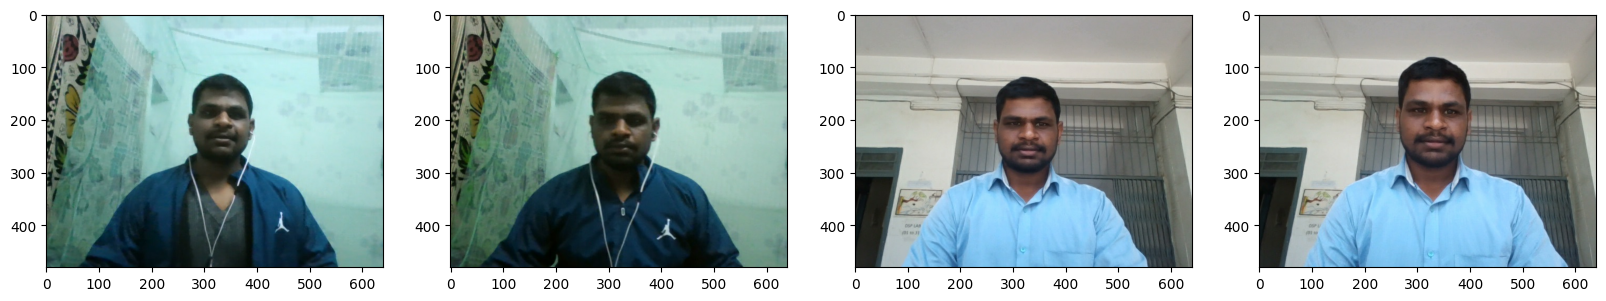

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## ##partition unaugmented data

In [21]:
105*.7 ##  to train

73.5

In [22]:
105*.15 ## to validate and test

15.75

In [23]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)       

applying augmentation on  image and labels using albumentations

In [44]:
!pip install --user albumentations

In [15]:
img = cv2.imread(os.path.join('data','train','images','289b8615-d65d-11ee-9207-f5ba6e523fbf.jpg'))

In [16]:
img.shape

(480, 640, 3)

In [16]:
import albumentations as alb

In [20]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [17]:
img = cv2.imread(os.path.join('data','train', 'images','289b8615-d65d-11ee-9207-f5ba6e523fbf.jpg'))

In [18]:
img

array([[[17, 42, 38],
        [14, 41, 37],
        [21, 48, 44],
        ...,
        [52, 57, 36],
        [54, 56, 37],
        [54, 54, 36]],

       [[15, 40, 36],
        [14, 41, 37],
        [22, 52, 47],
        ...,
        [50, 55, 34],
        [51, 53, 34],
        [51, 53, 34]],

       [[11, 39, 33],
        [13, 41, 35],
        [24, 54, 49],
        ...,
        [49, 55, 36],
        [51, 54, 38],
        [51, 54, 38]],

       ...,

       [[ 1, 12,  9],
        [ 0, 11,  8],
        [ 0, 10,  8],
        ...,
        [15, 44, 21],
        [15, 43, 24],
        [15, 43, 24]],

       [[ 0, 14,  8],
        [ 0, 13,  7],
        [ 0, 10,  7],
        ...,
        [13, 45, 21],
        [13, 43, 24],
        [13, 42, 26]],

       [[ 1, 15,  9],
        [ 0, 14,  8],
        [ 0, 11,  8],
        ...,
        [12, 43, 22],
        [13, 43, 24],
        [13, 42, 26]]], dtype=uint8)

In [23]:
with open(os.path.join('data', 'train', 'labels', '289b8615-d65d-11ee-9207-f5ba6e523fbf.json'), 'r') as f:
    label = json.load(f)

In [24]:
label['shapes'][0]['points']

[[261.38888888888886, 107.77777777777777],
 [401.9444444444444, 294.44444444444446]]

In [25]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [26]:
coords

[261.38888888888886, 107.77777777777777, 401.9444444444444, 294.44444444444446]

In [27]:
coords = list(np.divide(coords, [640,480,640,480]))

In [28]:
coords

[0.40842013888888884,
 0.22453703703703703,
 0.6280381944444444,
 0.6134259259259259]

Apply Augmentations and View Results

In [29]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [30]:
augmented['bboxes'][0][2:]

(0.501358024691358, 0.6098765432098766)

In [31]:
augmented['bboxes']

[(0.18901234567901237,
  0.19506172839506172,
  0.501358024691358,
  0.6098765432098766)]

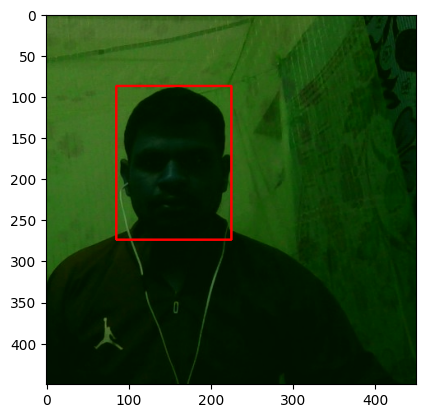

In [32]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

Build and Run Augmentation Pipeline

In [31]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(50):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

 Load Augmented Images to Tensorflow Dataset

In [33]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [34]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [35]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [36]:
train_images.as_numpy_iterator().next()

array([[[5.20833349e-03, 2.38970597e-03, 0.00000000e+00],
        [5.75980404e-03, 5.39215701e-03, 0.00000000e+00],
        [1.28676475e-03, 9.12990235e-03, 0.00000000e+00],
        ...,
        [0.00000000e+00, 6.86274515e-03, 0.00000000e+00],
        [0.00000000e+00, 1.96078443e-03, 0.00000000e+00],
        [4.47303941e-03, 2.05882359e-02, 0.00000000e+00]],

       [[0.00000000e+00, 8.33333377e-03, 0.00000000e+00],
        [3.92156886e-03, 1.32352943e-02, 0.00000000e+00],
        [1.51960785e-02, 2.30392162e-02, 3.43137258e-03],
        ...,
        [4.41176491e-03, 3.08823530e-02, 3.92156886e-03],
        [7.35294120e-03, 2.69607846e-02, 3.43137258e-03],
        [0.00000000e+00, 2.94117648e-02, 0.00000000e+00]],

       [[0.00000000e+00, 2.20588241e-02, 0.00000000e+00],
        [3.92156886e-03, 2.35294122e-02, 0.00000000e+00],
        [4.28921572e-04, 2.00367644e-02, 0.00000000e+00],
        ...,
        [6.43382361e-03, 1.42769609e-02, 0.00000000e+00],
        [4.28921572e-04, 8.27

Prepare Labels

Build Label Loading Function

In [37]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

 Load Labels to Tensorflow Dataset

In [38]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [39]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3965, 0.3945, 0.709 , 0.8096], dtype=float16))

Combine Label and Image Samples

Check Partition Lengths

In [42]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3800, 3800, 800, 800, 800, 800)

 Create Final Datasets (Images/Labels)

In [43]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [44]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [45]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [46]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3977, 0.12  , 0.7495, 0.593 ],
        [0.1913, 0.3552, 0.4985, 0.769 ],
        [0.2676, 0.386 , 0.4824, 0.6304],
        [0.3713, 0.1805, 0.7056, 0.599 ],
        [0.3982, 0.3916, 0.707 , 0.778 ],
        [0.3335, 0.3442, 0.6406, 0.758 ],
        [0.0833, 0.2233, 0.4092, 0.644 ],
        [0.511 , 0.3853, 0.837 , 0.7754]], dtype=float16))

 View Images and Annotations

In [47]:
data_samples = train.as_numpy_iterator()

In [48]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


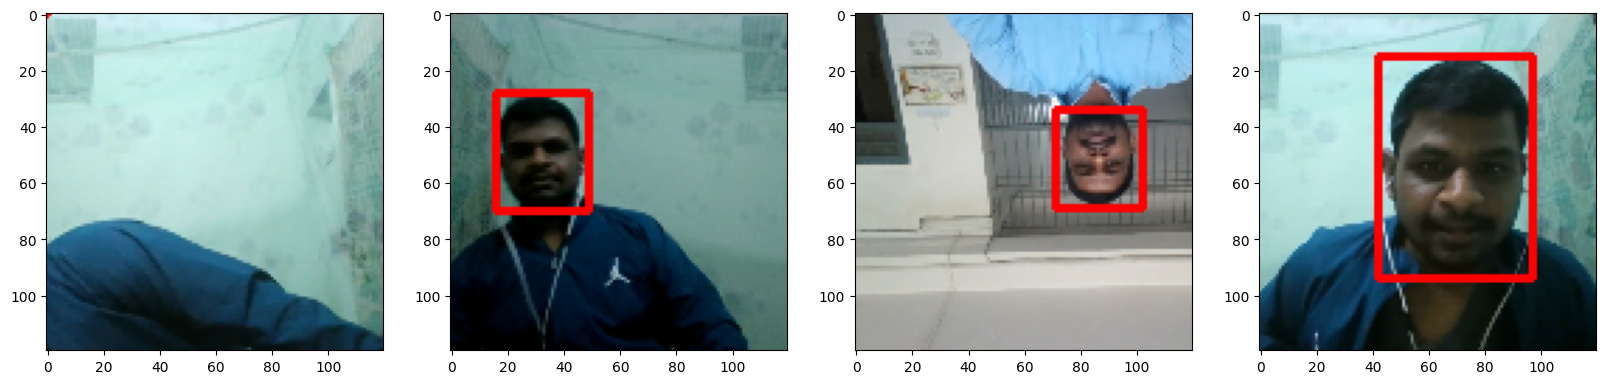

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

Build Deep Learning using the Functional API

 Import Layers and Base Network

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

 Download VGG16

In [51]:
vgg = VGG16(include_top=False)

In [52]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Build instance of Network

In [53]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

Test out Neural Network

In [54]:
facetracker = build_model()

In [55]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [57]:
X, y = train.as_numpy_iterator().next()

In [58]:
X.shape

(8, 120, 120, 3)

In [59]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 702ms/step


In [60]:
classes, coords

(array([[0.66571754],
        [0.6443282 ],
        [0.6928775 ],
        [0.55827385],
        [0.6850296 ],
        [0.635538  ],
        [0.639406  ],
        [0.6048882 ]], dtype=float32),
 array([[0.59586835, 0.6057975 , 0.54617625, 0.6481559 ],
        [0.58075917, 0.58679783, 0.6128593 , 0.6864829 ],
        [0.5557933 , 0.5356193 , 0.561929  , 0.71863616],
        [0.54788536, 0.6014677 , 0.5335449 , 0.7128843 ],
        [0.61197054, 0.61048603, 0.5887436 , 0.71508366],
        [0.5438943 , 0.5756419 , 0.6185137 , 0.70507634],
        [0.5825236 , 0.6269858 , 0.4551759 , 0.8472142 ],
        [0.54215014, 0.6412469 , 0.554986  , 0.64535767]], dtype=float32))

Define Losses and Optimizers

Define Optimizer and LR

In [61]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [62]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

Create Localization Loss and Classification Loss

In [63]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [64]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

Test out Loss Metrics

In [65]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.3597703>

In [66]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5489192>

In [67]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=3.3597703>

Train Neural Network

Create Custom Model Class

In [68]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [69]:
model = FaceTracker(facetracker)

In [70]:
model.compile(opt, classloss, regressloss)

Train

In [71]:
logdir='logs'

In [72]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [73]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
475/475 [==============================] - 494s 1s/step - total_loss: 0.1803 - class_loss: 0.0459 - regress_loss: 0.1573 - val_total_loss: 7.3284 - val_class_loss: 7.7562 - val_regress_loss: 3.4503
Epoch 2/10
475/475 [==============================] - 506s 1s/step - total_loss: 0.0525 - class_loss: 0.0175 - regress_loss: 0.0438 - val_total_loss: 10.4115 - val_class_loss: 11.3908 - val_regress_loss: 4.7161
Epoch 3/10
475/475 [==============================] - 478s 999ms/step - total_loss: 0.0465 - class_loss: 0.0149 - regress_loss: 0.0390 - val_total_loss: 9.7655 - val_class_loss: 10.5660 - val_regress_loss: 4.4825
Epoch 4/10
475/475 [==============================] - 493s 1s/step - total_loss: 0.0176 - class_loss: 0.0055 - regress_loss: 0.0149 - val_total_loss: 8.8912 - val_class_loss: 9.4576 - val_regress_loss: 4.1624
Epoch 5/10
475/475 [==============================] - 662s 1s/step - total_loss: 0.0088 - class_loss: 0.0027 - regress_loss: 0.0074 - val_total_loss: 8.2111 -

 Plot Performance

In [74]:
hist.history

{'total_loss': [0.040424276143312454,
  0.05359826236963272,
  0.011809957213699818,
  0.008697591722011566,
  0.013660991564393044,
  0.007585471495985985,
  0.00789439957588911,
  0.011321475729346275,
  0.01083771325647831,
  0.006689179223030806],
 'class_loss': [1.7844888134277426e-05,
  0.020173218101263046,
  1.0758803000499029e-05,
  1.7904636479215696e-05,
  0.003737431252375245,
  5.697691085515544e-05,
  0.00019133335445076227,
  0.00015360098041128367,
  0.0003340967814438045,
  8.083224383881316e-05],
 'regress_loss': [0.04041535407304764,
  0.04351165145635605,
  0.011804577894508839,
  0.008688639849424362,
  0.011792276054620743,
  0.007556983269751072,
  0.007798733189702034,
  0.011244675144553185,
  0.010670664720237255,
  0.006648763082921505],
 'val_total_loss': [7.328367233276367,
  10.411518096923828,
  9.765464782714844,
  8.891218185424805,
  8.211112022399902,
  8.35798454284668,
  5.170587539672852,
  5.625487327575684,
  7.499642848968506,
  7.46510982513427

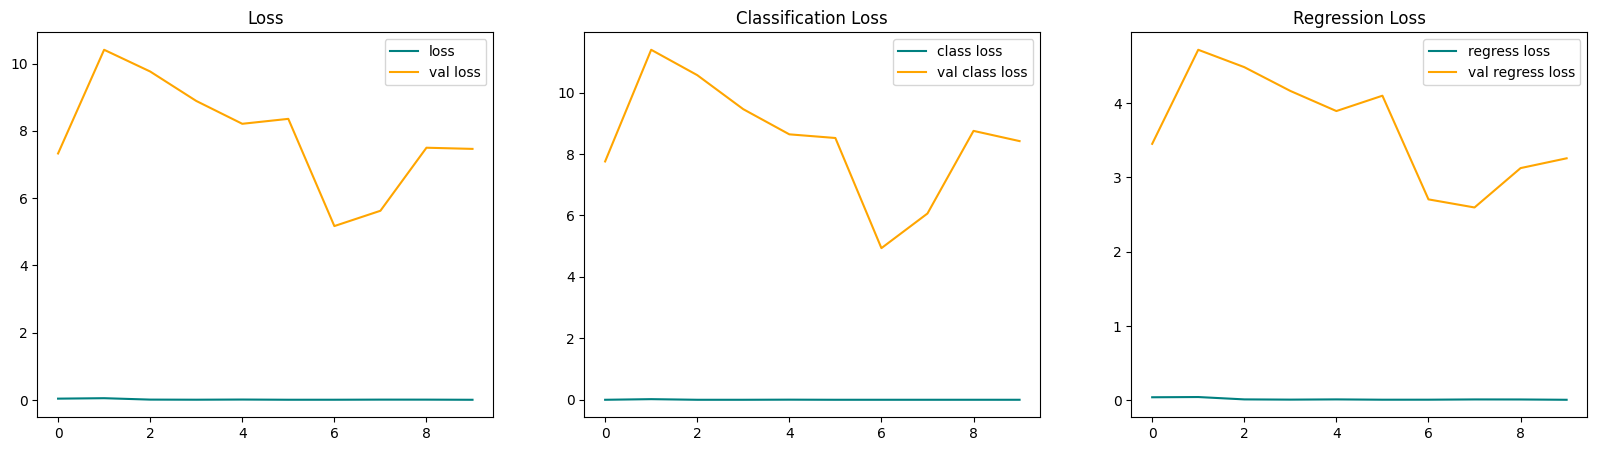

In [75]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

Make Predictions

Make Predictions on Test Set

In [76]:
test_data = test.as_numpy_iterator()

In [77]:
test_sample = test_data.next()

In [78]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 375ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


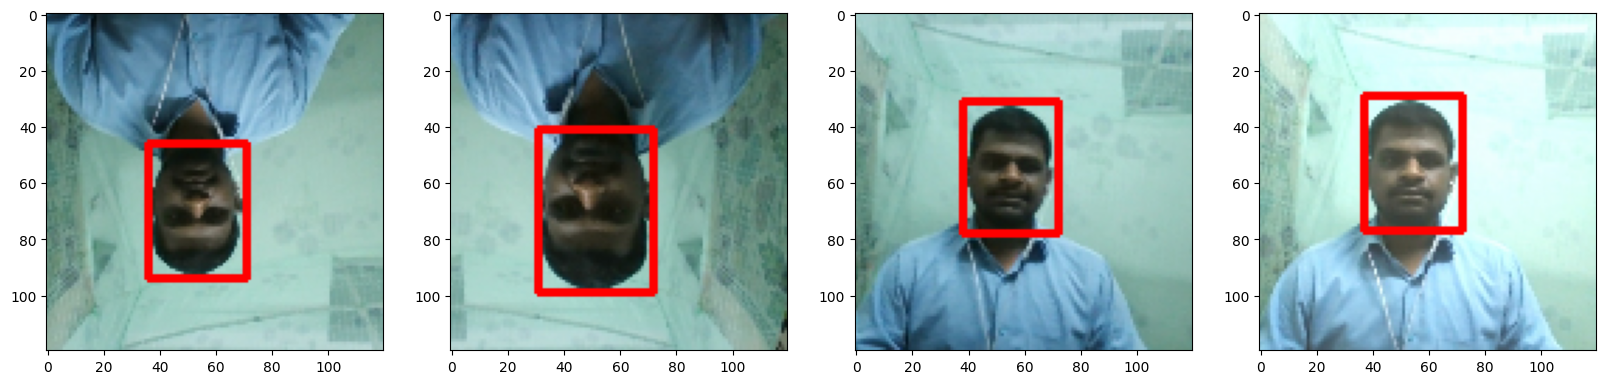

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

Save the Model

In [80]:
from tensorflow.keras.models import load_model

In [81]:
facetracker.save('facetracker.h5')

C:\Users\ashis\anaconda3\envs\ant\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
facetracker = load_model('facetracker.h5')

Real Time Detection

In [83]:
import cv2

In [ ]:
# cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        frame = frame[50:500, 50:500, :]

        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized = tf.image.resize(rgb, (120, 120))

        yhat = facetracker.predict(np.expand_dims(resized / 255, 0))
        sample_coords = yhat[1][0]

        if yhat[0] > 0.5:
            # Controls the main rectangle
            cv2.rectangle(frame,
                          tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                          tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                          (255, 0, 0), 2)
            # Controls the label rectangle
            cv2.rectangle(frame,
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                       [0, -30])),
                          tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                       [80, 0])),
                          (255, 0, 0), -1)

            # Controls the text rendered
            cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                                     [0, -5])),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('EyeTrack', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()
